# PCA-Based Signal Denoising

In this notebook, we apply Principal Component Analysis (PCA) to denoise
simulated detector signals and compare the results to classical filtering
approaches.


In [16]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from src.signals import gaussian_pulse
from src.noise import add_gaussian_noise
from src.filters import moving_average
from src.models import pca_denoise
from src.metrics import mse, snr


In [17]:
n_signals = 1000
n_points = 1000

t = np.linspace(0, 10, n_points)

signals = []
for _ in range(n_signals):
    clean = gaussian_pulse(
        t,
        amplitude=1.0,
        t0=5.0 + np.random.uniform(-0.2, 0.2),
        sigma=0.5
    )
    noisy = add_gaussian_noise(clean, noise_std=0.5)
    signals.append(noisy)

signals = np.array(signals)


In [18]:
denoised_signals = pca_denoise(signals, n_components=5)


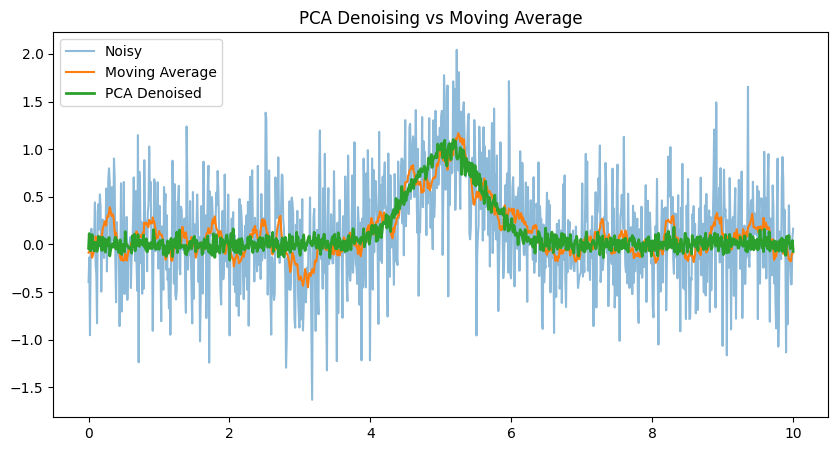

In [19]:
index = 0

raw = signals[index]
pca_clean = denoised_signals[index]
ma_clean = moving_average(raw, window_size=15)

plt.figure(figsize=(10, 5))
plt.plot(t, raw, label="Noisy", alpha=0.5)
plt.plot(t, ma_clean, label="Moving Average")
plt.plot(t, pca_clean, label="PCA Denoised", linewidth=2)
plt.legend()
plt.title("PCA Denoising vs Moving Average")
plt.show()

In [20]:
mse_noisy = mse(clean, raw)
mse_ma = mse(clean, ma_clean)
mse_pca = mse(clean, pca_clean)

snr_noisy = snr(clean, raw - clean)
snr_ma = snr(clean, ma_clean - clean)
snr_pca = snr(clean, pca_clean - clean)

print("MSE")
print(f"Noisy: {mse_noisy:.4f}")
print(f"Moving Avg: {mse_ma:.4f}")
print(f"PCA: {mse_pca:.4f}")

print("\nSNR (dB)")
print(f"Noisy: {snr_noisy:.2f}")
print(f"Moving Avg: {snr_ma:.2f}")
print(f"PCA: {snr_pca:.2f}")


MSE
Noisy: 0.2472
Moving Avg: 0.0280
PCA: 0.0112

SNR (dB)
Noisy: -4.46
Moving Avg: 5.01
PCA: 8.99


Quantitative evaluation shows that PCA denoising significantly outperforms
a moving average filter. PCA achieves the lowest mean squared error and the
highest signal-to-noise ratio, indicating superior noise suppression while
preserving the underlying pulse shape.


### Summary

PCA-based denoising leverages correlations across multiple signals to
separate structured detector responses from uncorrelated noise. Compared
to a moving average filter, PCA preserves pulse shape and peak amplitude.
